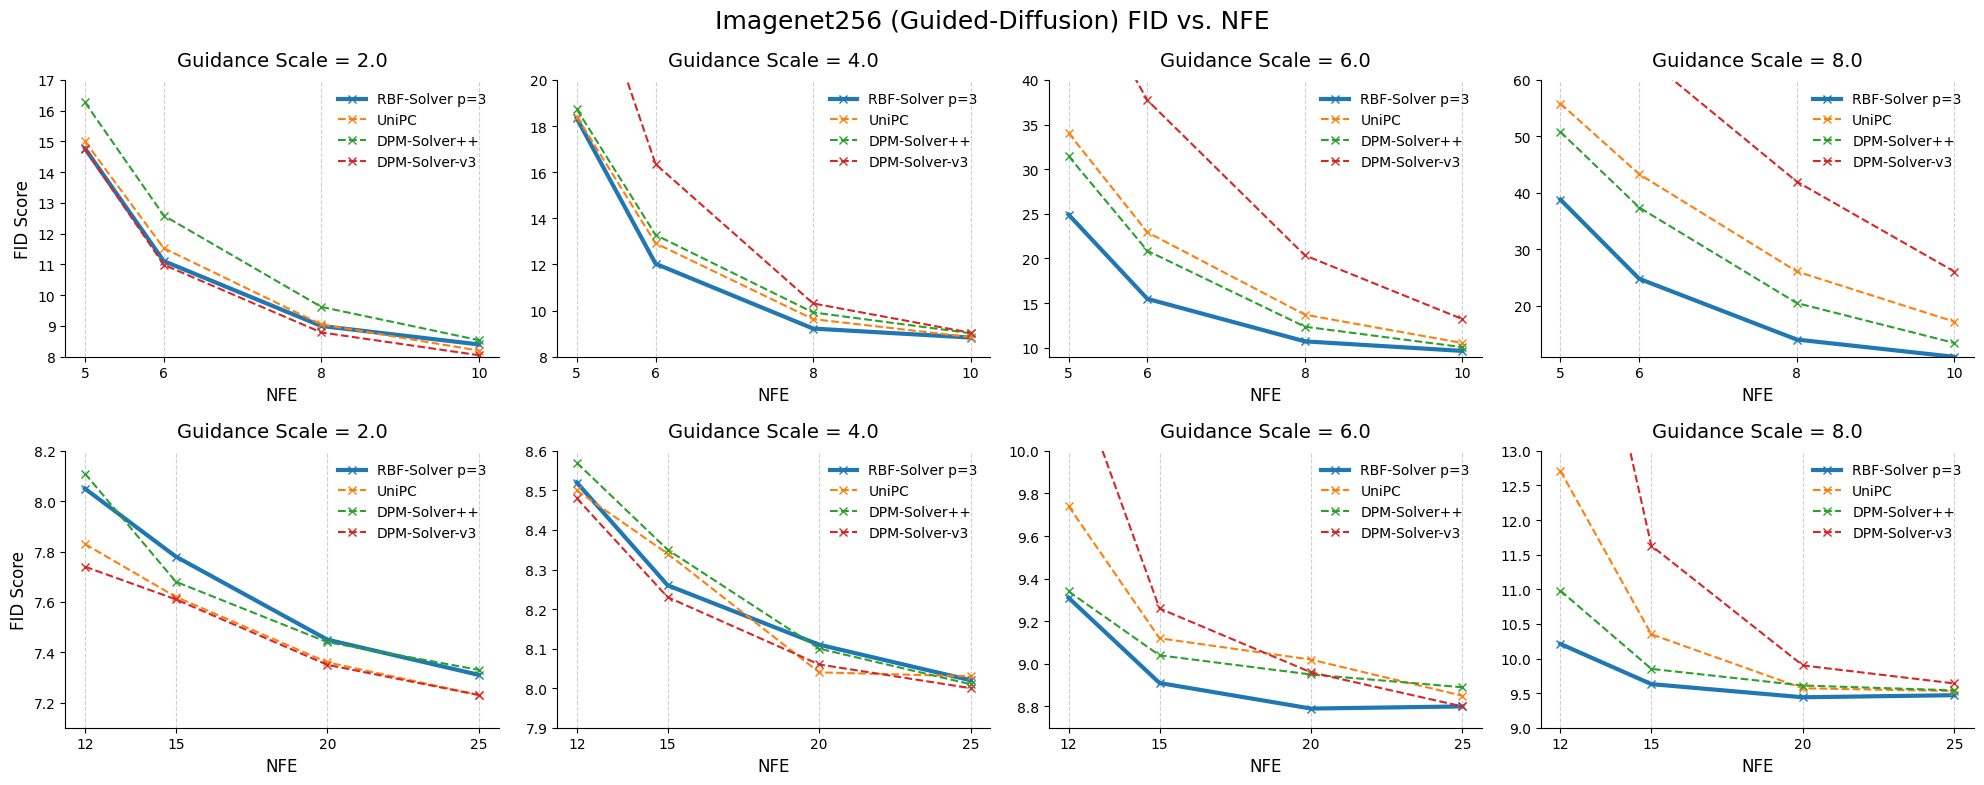

In [1]:
import matplotlib.pyplot as plt

# Professional global style
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.6,
    'axes.spines.top': False,
    'axes.spines.right': False,
})

# Define NFE groups
nfe_small = [5, 6, 8, 10]
nfe_large = [12, 15, 20, 25]
scales = [2.0, 4.0, 6.0, 8.0]

# Full FID data
full_data = {
    2.0: {#'RBF-Solver p=2': [15.05, 11.45, 9.11, 8.28, 7.87, 7.71, 7.43, 7.31],
          'RBF-Solver p=3': [14.77, 11.11, 9.00, 8.40, 8.05, 7.78, 7.45, 7.31],
          'UniPC':         [15.00, 11.53, 9.05, 8.20, 7.83, 7.62, 7.36, 7.23],
          'DPM-Solver-v3': [14.75, 10.99, 8.79, 8.05, 7.74, 7.61, 7.35, 7.23],
          'DPM-Solver++':  [16.27, 12.59, 9.62, 8.54, 8.11, 7.68, 7.44, 7.33]},
    4.0: {#'RBF-Solver p=2': [17.76, 12.47, 9.55, 8.95, 8.58, 8.35, 8.08, 8.01],
          'RBF-Solver p=3': [18.33, 12.03, 9.22, 8.83, 8.52, 8.26, 8.11, 8.02],
          'UniPC':         [18.41, 12.92, 9.63, 8.85, 8.50, 8.34, 8.04, 8.03],
          'DPM-Solver-v3': [26.37, 16.35, 10.31, 9.04, 8.48, 8.23, 8.06, 8.00],
          'DPM-Solver++':  [18.73, 13.28, 9.92, 9.02, 8.57, 8.35, 8.10, 8.01]},
    6.0: {#'RBF-Solver p=2': [26.78, 16.21, 11.00, 9.74, 9.39, 8.97, 8.95, 8.79],
          'RBF-Solver p=3': [24.91, 15.48, 10.72, 9.65, 9.31, 8.91, 8.79, 8.80],
          'UniPC':         [34.05, 22.93, 13.71, 10.53, 9.74, 9.12, 9.02, 8.85],
          'DPM-Solver-v3': [53.52, 37.72, 20.35, 13.21, 10.44, 9.26, 8.96, 8.80],
          'DPM-Solver++':  [31.46, 20.86, 12.36, 10.07, 9.34, 9.04, 8.95, 8.89]},
    8.0: {#'RBF-Solver p=2': [42.61, 24.79, 13.79, 11.25, 10.30, 9.69, 9.46, 9.42],
          'RBF-Solver p=3': [38.81, 24.79, 14.04, 10.98, 10.21, 9.63, 9.44, 9.47],
          'UniPC':         [55.80, 43.31, 26.09, 17.20, 12.71, 10.35, 9.57, 9.53],
          'DPM-Solver-v3': [79.14, 64.93, 41.99, 26.08, 17.48, 11.63, 9.90, 9.64],
          'DPM-Solver++':  [50.80, 37.41, 20.50, 13.44, 10.98, 9.85, 9.61, 9.54]},
}

# Plot order
method_order = ['RBF-Solver p=3',
                #'RBF-Solver p=2',
                'UniPC',
                'DPM-Solver++',
                'DPM-Solver-v3',]

# Y-limits
small_ylims = {2.0: (8, 17), 4.0: (8, 20), 6.0: (9, 40), 8.0: (11, 60)}
large_ylims = {2.0: (7.1, 8.2), 4.0: (7.9, 8.6), 6.0: (8.7, 10.0), 8.0: (9, 13)}

# Create combined figure
fig, axs = plt.subplots(2, 4, figsize=(20, 8))

# Top row: small NFEs
for idx, scale in enumerate(scales):
    ax = axs[0, idx]
    for method in method_order:
        vals = full_data[scale][method][:4]
        lw = 3 if method.startswith('RBF-Solver') else 1.5
        ls = '-' if method.startswith('RBF-Solver') else '--'
        ax.plot(nfe_small, vals, linestyle=ls, marker='x', linewidth=lw, label=method)
    ax.set_ylim(*small_ylims[scale])
    ax.set_title(f'Guidance Scale = {scale}', pad=10)
    ax.set_xlabel('NFE')
    if idx == 0: ax.set_ylabel('FID Score')
    ax.set_xticks(nfe_small)
    ax.legend(frameon=False, loc='upper right')
    ax.grid(axis='y')

# Bottom row: large NFEs
for idx, scale in enumerate(scales):
    ax = axs[1, idx]
    for method in method_order:
        vals = full_data[scale][method][4:]
        lw = 3 if method.startswith('RBF-Solver') else 1.5
        ls = '-' if method.startswith('RBF-Solver') else '--'
        ax.plot(nfe_large, vals, linestyle=ls, marker='x', linewidth=lw, label=method)
    ax.set_ylim(*large_ylims[scale])
    ax.set_title(f'Guidance Scale = {scale}', pad=10)
    ax.set_xlabel('NFE')
    if idx == 0: ax.set_ylabel('FID Score')
    ax.set_xticks(nfe_large)
    ax.legend(frameon=False, loc='upper right')
    ax.grid(axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Imagenet256 (Guided-Diffusion) FID vs. NFE', fontsize=18)
plt.show()
